## Import Libraries
import libraries yang kiranya akan digunakan untuk menganalisi dan memprediksi data

In [2]:
#Data Processing
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Data Scalling
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,MaxAbsScaler


##
from sklearn.preprocessing import Normalizer,Binarizer




#Data encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Data Splitting
from sklearn.model_selection import train_test_split


#Regressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge, BayesianRidge, ElasticNet, HuberRegressor,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

##Polynomial
from sklearn.preprocessing import PolynomialFeatures as PF

##Pipeline
from sklearn.pipeline import make_pipeline


#Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score,mean_squared_error as mse,confusion_matrix



#stats model
from scipy.stats import shapiro

#Ignore Warning
import warnings
warnings.filterwarnings('ignore')


### load data menggunakan ``pd.read_csv``

Karena perintah membatasi row data sampai dengan 5000 row maka kita menggunakan slicing untuk membatasi jumlah row sesuai perintah soal dan memilih 16 coloumn yang akan digunakan. Gunakan ``.head()`` yaitu untuk mengetahui 5 data teratas dan ``.tail()`` yaitu untuk mengetahui 5 data terakhir sehingga kita dapat mengetahui gambaran mengenai dataset yang kita gunakan

In [3]:
data = pd.read_csv("hotel_bookings.csv")[0:5000]

In [8]:
df = data[['hotel','is_canceled', 'adults', 'children', 'babies', 'meal', 
           'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 
           'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 
           'required_car_parking_spaces', 'total_of_special_requests']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

In [10]:
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [11]:
df.tail()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0


Menggunakan ``df.info`` kita dapat mendapatkan gambaran umum mengenai dataset, terdapat beberapa informasi yang akan bisa kita dapatkan yang pertama kita dapat mengetahui rangeindex atau jumlah baris sebanyak 5000 row, terdiri dari index 0 sampai 4999 sesuai dengan perintah soal

selajutnya pada **columns**, kita dapat melihat nama-nama kolom(variable) dan jenis typedatandari dataset yang kita digunakan.Pada kolom **Non null count**, kita dapat mengetahui jumlah data yang terisi, sehingga dari informasi di bawah ini kita  dapat mengetahui jumlah berapa missing values dari data ini per variable nya, dengan cara jumlah entri data dikurangi Non Null Count, semisalnya pada column ***country***, kita dapat melihat bahwa ada 4998 Non Null Count dari 5000 entri, sehingga kita dapat memastikan bahwa pada column ini terdapat 2 missing value.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

Menggunakan ``df.describe`` untuk mengetahui informasi, diantaranya **count** untuk menghitung total row, **mean** untuk mengetahui nilai rata-rata yang ada pada tiap kolom , **std** untuk mengetahui sebaran dalam tiap kolom, **min** untuk mengetahui nilai minimum pada tiap kolom dan **max** untuk mengetahui nilai maksimal pada tiap kolom.

sedangkan 25%,50%, dan 75% mengacu pada Q1,Q2,dan Q3. Quantile merupakan pengukuran posisi pada suatu data, yang mana posisi quantile mewakili  diamana proporsi tersebut dari distribusi data.


In [17]:
df.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.459600,1.969800,0.115600,0.014800,0.207200,1.772000,0.093800,0.602000
std,0.498415,1.566326,0.444833,0.122409,0.612489,13.545358,0.292948,0.823245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,2.000000,17.000000,122.000000,2.000000,4.000000


In [ ]:
Membuat dataframe untuk mengetahui jumlah dari data yang nan pada tiap kolom dan menghitung uniqe value pada tiap2 column

In [20]:
pd.DataFrame({'Variables/ Columns' : df.columns, 'dataType' : df.dtypes, 
              'null' : df.isna().sum(), 'unique' : df.nunique()}).reset_index(drop = True)

,Variables/ Columns,dataType,null,unique
0,hotel,object,0,1
1,is_canceled,int64,0,2
2,adults,int64,0,14
3,children,float64,0,4
4,babies,int64,0,3
5,meal,object,0,5
6,country,object,2,56
7,market_segment,object,0,6
8,distribution_channel,object,0,3
9,reserved_room_type,object,0,9


## A.  Data Preprocessing


Setelah dilakukan pengecekan missing value, hanya satu coloumns saja yang memiliki nilai nan atau data yang tidak terisi dan berjumlah 2 yaitu column **country**, cara untuk menghandling pada case ini bisa dengan  menghapus row pada data yang column country-nya terdapat missing valuen atau mengisi data nan menggunakan top data atau data yang memiliki kemunculan kolom terbanyak pada country dan saya memutuskan untuk mengisi data nan menggunakan top data


In [18]:
#cek row yang memiliki value nan pada df['country']

df[df['country'].isna()]

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
30,Resort Hotel,0,1,0.0,0,BB,NaN,Direct,Direct,A,2,No Deposit,0,Transient,0,2
4127,Resort Hotel,1,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,P,0,No Deposit,0,Transient,0,0


In [24]:
#Melihat frekuensi kemunculan data pada feature row
df['country'].value_counts().head()

PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
Name: country, dtype: int64

Karena data yang paling banyak muncul pada coloumn country 'PRT' maka data nan dapat kita isi dengan value 'PRT', Lalu kita akan melakukan pengisian pada missing values berdasarkan hasil ini dan mencoba untuk menampilkan kembali data yang bermasalah tadi.

In [25]:
df['country'] = df['country'].fillna('PRT')

In [32]:
pd.DataFrame({'Variables/ Columns' : df[['country']].columns,'Null Values ': df[['country']].isna().sum() }).reset_index(drop = True)

,Variables/ Columns,Null Values
0,country,0


## B. Exploratory Data Analysis

In [40]:
df_cancellation = df.groupby(by="is_canceled").count().reset_index()['hotel']
df_cancellation



In [41]:
df_cancellation

0    2702
1    2298
Name: hotel, dtype: int64

### Melihat diagram Presentase antara booking cancelled or not cancelled

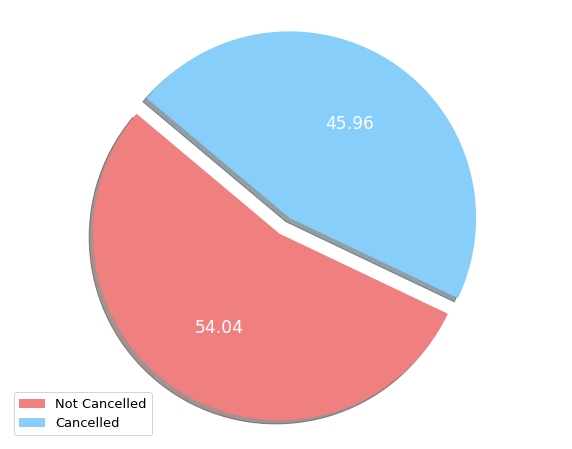

In [47]:

colors = ["lightcoral","lightskyblue"]
plt.figure(figsize=(10,8))
labels = 'Not Cancelled','Cancelled'
plt.pie(df_cancellation,autopct = '%.2f',colors=colors,shadow=True,startangle=140,
       textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))
plt.axis('equal') #bentuk lingkaran
plt.legend(labels, loc='lower left', fontsize = 13)
plt.show()

Dari plot di atas kita dapat melihat bahwa dari total 5000 pesanan, ada 45.96% pesanan atau sekitar 2298 pesanan yang di cancel sehingga menyisakan 54.06% pesanan atau sekitar 2702 pesanan yang tidak di cancel.

In [57]:
## Memisah feature/kolom  yang tergolong data kategorikal
df_cat = df.loc[:, df.dtypes == np.object]
df_cat.head()

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,Resort Hotel,BB,PRT,Direct,Direct,C,No Deposit,Transient
1,Resort Hotel,BB,PRT,Direct,Direct,C,No Deposit,Transient
2,Resort Hotel,BB,GBR,Direct,Direct,A,No Deposit,Transient
3,Resort Hotel,BB,GBR,Corporate,Corporate,A,No Deposit,Transient
4,Resort Hotel,BB,GBR,Online TA,TA/TO,A,No Deposit,Transient


In [63]:
#memisahkan feature/kolom yang tergolong numeric
df_numeric = df.loc[:, df.dtypes != np.object]
df_numeric


,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0,2,0.0,0,3,0,0,0
1,0,2,0.0,0,4,0,0,0
2,0,1,0.0,0,0,0,0,0
3,0,1,0.0,0,0,0,0,0
4,0,2,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4995,1,2,0.0,0,0,0,0,0
4996,1,2,0.0,0,0,0,0,0
4997,1,2,0.0,0,0,0,0,0
4998,1,2,0.0,0,0,0,0,0


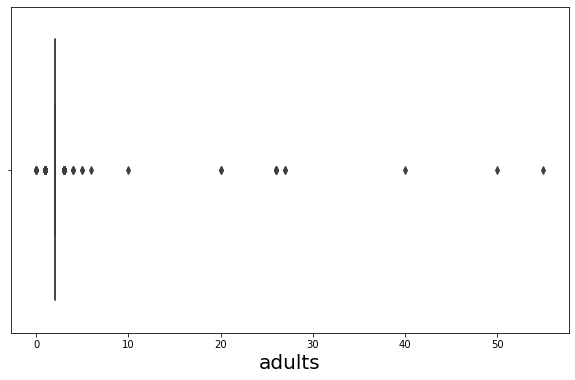

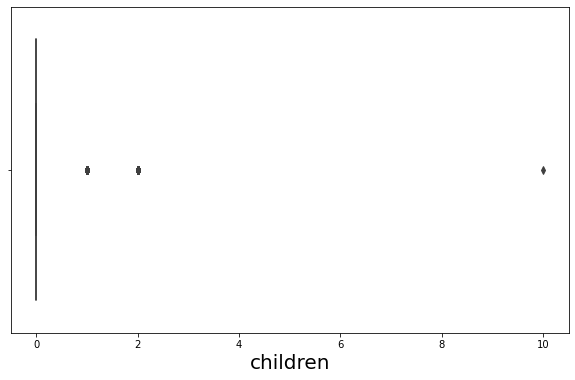

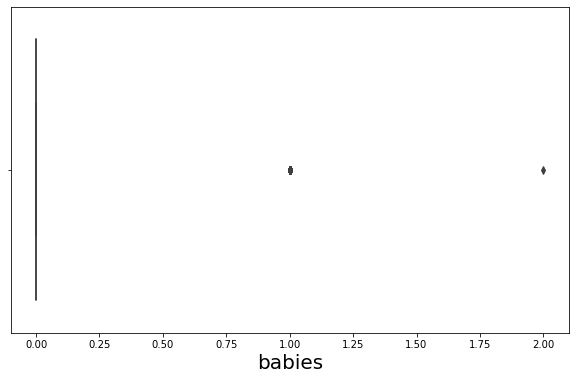

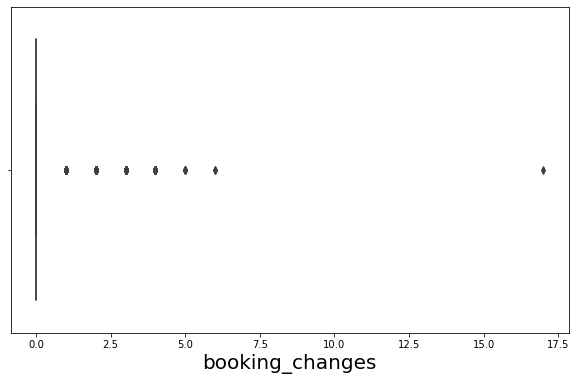

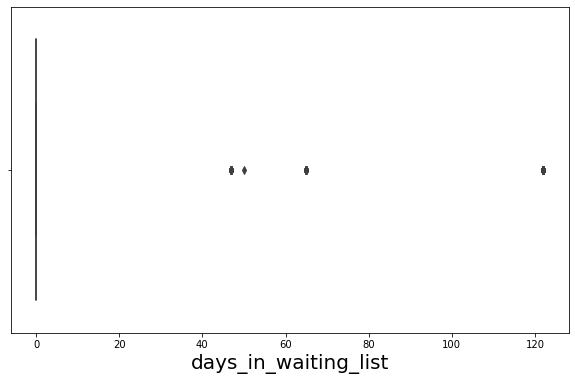

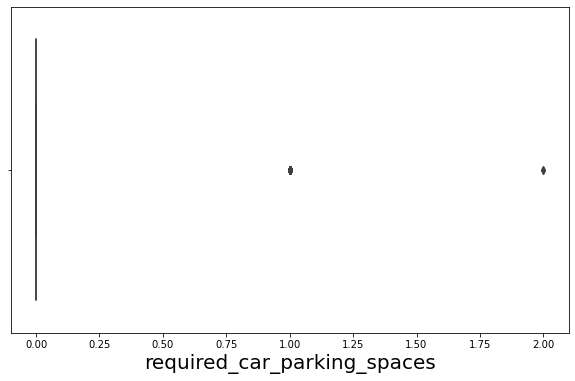

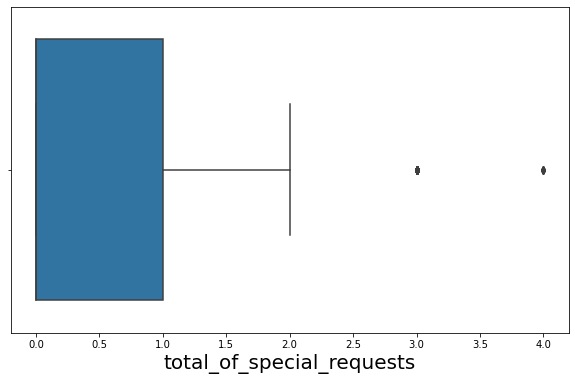

In [66]:
for columns in df_numeric.drop(columns=['is_canceled']):
    plt.figure(figsize = (10,6))
    ax = sns.boxplot(x = columns, data = df)
    
    plt.xlabel(columns, fontsize = 20);   
  

In [67]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

Bedasarkan dari pengamatan boxplot, ditemukan beberapa column yang memiliki nilai ekstrim yang cukup jauh.Apabila data outlier akan kita gunakan, maka proses scalling yang akan kita gunakan yaitu ``RobustScaller()``, sehingga setelah dilakukan proces scalling data tidak akan terpengaruh terhadap data outlier.

<Figure size 576x720 with 0 Axes>

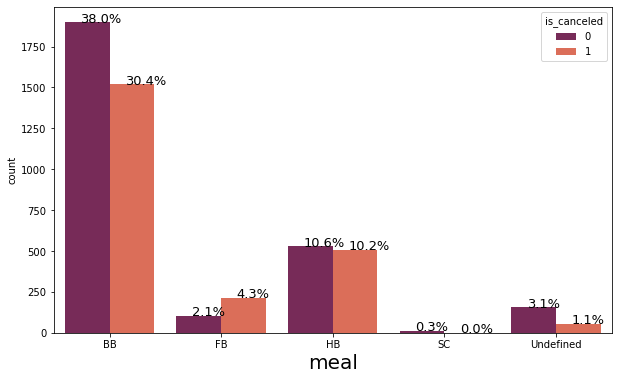

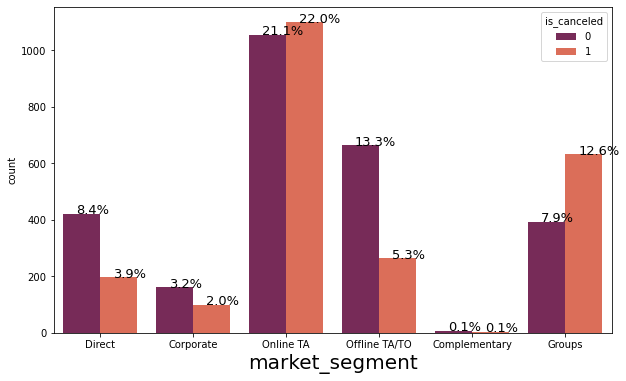

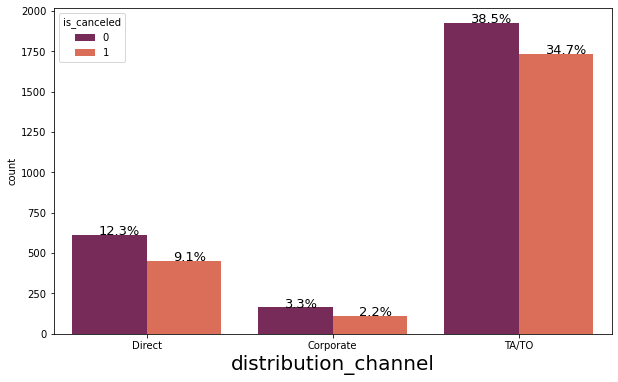

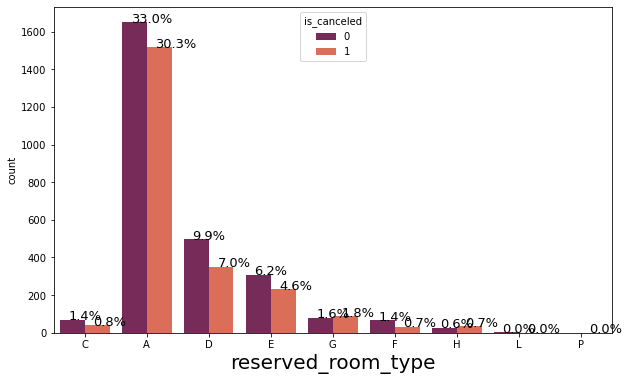

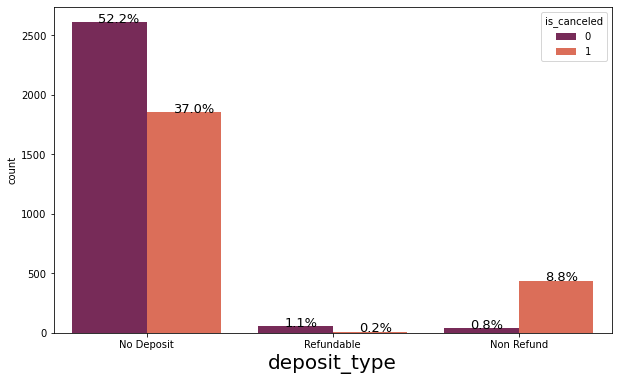

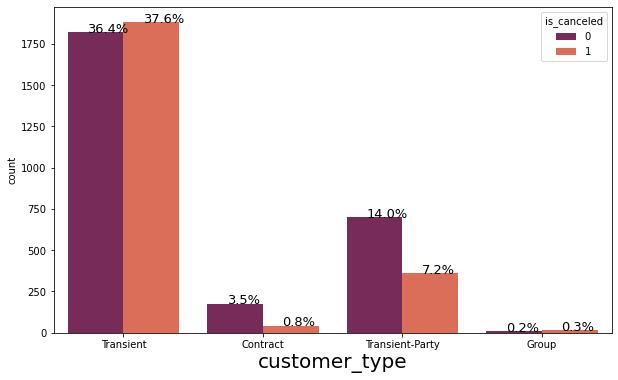

In [61]:
%matplotlib inline
plt.figure(figsize=(8,10))
for columns in df_cat.drop(columns=['hotel', 'country']):
    plt.figure(figsize = (10,6))
    ax = sns.countplot(x = columns, data = df, hue = 'is_canceled',palette="rocket")
     
    total = len(df[columns])
    for fit in ax.patches:
        pct = '{:.1f}%'.format(100 * fit.get_height()/total)
        xpos = fit.get_x() + 0.14
        ypos = fit.get_height()
        ax.annotate(pct, (xpos, ypos), fontsize = 13)
        
    plt.xlabel(columns, fontsize = 20)    
    plt.show()

1. Jenis makanan yang sering dipesan adalah jenis BB yaitu (Bed & Breakfast) dengan total pemesanan sebanyak 38%
2. Segmentasi dari pesanan yang di pesan kebanyakan adalah melalui Online dengan presentasi sebesar 21.1%, namun sisa di katergori ini menyumbang sebanyak 22.0% pembatalan yang mana pada segment pemesanan online angka cancellation lebih tinggi dibandingkan dengan segment pemesanan lainnya.
3. Channel Distribusi kebanyakan melalui Travel Agent 
4. Tipe ruangan yang di reservasi kebanyakan tipe A dengan total 33% dari total semua pemesanan, dengan 30% pembatalan.
5. Sebagian besar dari pemesan tidak melakukan jaminan deposit sebanyak (52%)
6. Tipe booking yang terbanyak adalah Transient, yaitu ketika booking ini dilakukan mandiri.


## C. Model Building & Hyper-parameter Tuning

In [68]:
df2 = df.copy()

Pada step Machine Learning saya akan menggunakan metode drop na untuk preprocessing data outlier

In [70]:
#Preprocessing pada data nan dengan cara me-drop data nan
df2.dropna(inplace=True)

### Melihat unique value dan describe pada tiap kolom

In [73]:
df2.describe(include='object').T

,count,unique,top,freq
hotel,5000,1,Resort Hotel,5000
meal,5000,5,BB,3418
country,5000,56,PRT,3176
market_segment,5000,6,Online TA,2156
distribution_channel,5000,3,TA/TO,3657
reserved_room_type,5000,9,A,3167
deposit_type,5000,3,No Deposit,4461
customer_type,5000,4,Transient,3699


In [72]:
df2.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
is_canceled,5000.0,0.4596,0.498415,0.0,0.0,0.0,1.0,1.0
adults,5000.0,1.9698,1.566326,0.0,2.0,2.0,2.0,55.0
children,5000.0,0.1156,0.444833,0.0,0.0,0.0,0.0,10.0
babies,5000.0,0.0148,0.122409,0.0,0.0,0.0,0.0,2.0
booking_changes,5000.0,0.2072,0.612489,0.0,0.0,0.0,0.0,17.0
days_in_waiting_list,5000.0,1.7720,13.545358,0.0,0.0,0.0,0.0,122.0
required_car_parking_spaces,5000.0,0.0938,0.292948,0.0,0.0,0.0,0.0,2.0
total_of_special_requests,5000.0,0.6020,0.823245,0.0,0.0,0.0,1.0,4.0


##### Melakukan Encoding pada data yang tergolong categorical agar mudah terbaca oleh model machine learning



In [76]:
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()
df2['deposit_type_encode']=labelencoder.fit_transform(df2['deposit_type'])
df2['customer_type_encode']=labelencoder.fit_transform(df2['customer_type'])
df2['distribution_channel_encode']=labelencoder.fit_transform(df2['distribution_channel'])
df2['meal_encode']=labelencoder.fit_transform(df2['meal'])
df2['market_segment_encode']=labelencoder.fit_transform(df2['market_segment'])
df2['reserved_room_type_encode']=labelencoder.fit_transform(df2['reserved_room_type'])
df2['country_encode'] = labelencoder.fit_transform(df2['country'])


### Melihat korelasi antar feature

In [81]:
correlation = df2.corr()["is_canceled"]
correlation.sort_values(ascending=False)[1:]

country_encode                 0.525207
deposit_type_encode            0.197458
market_segment_encode          0.059106
distribution_channel_encode    0.047328
adults                         0.045200
children                       0.024678
customer_type_encode          -0.009799
meal_encode                   -0.019277
reserved_room_type_encode     -0.025465
babies                        -0.029543
total_of_special_requests     -0.083072
days_in_waiting_list          -0.113426
booking_changes               -0.181608
required_car_parking_spaces   -0.295316
Name: is_canceled, dtype: float64

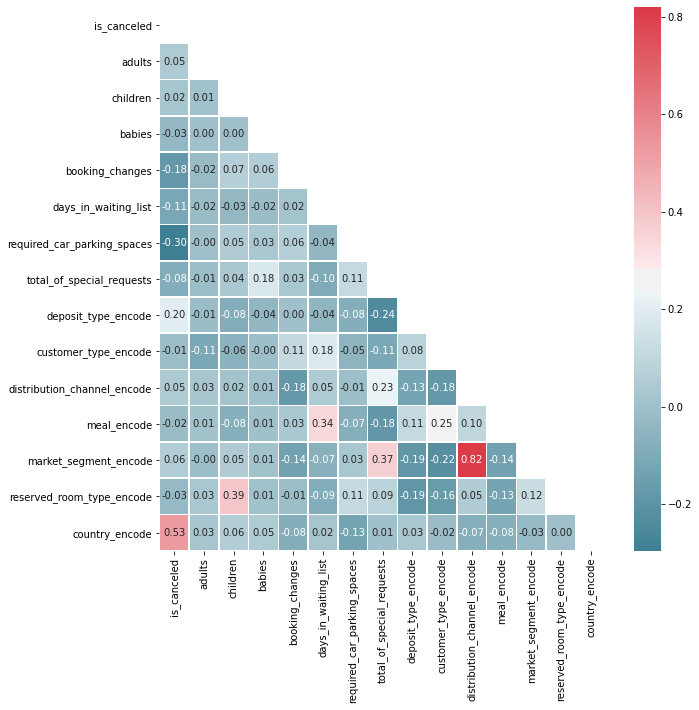

In [79]:
corr = df2.corr()
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidths=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

Dari hasil analisa correlation dan heatmap melihat seberapa kuat pengaruh tiap feature terhadap label ``is_cancelled``.

Dan pemilihan '``fitur`` yang akhirnya saya nilai cukup kuat terhadap label ``is_cancelled`` adalah
- `country_encode`
- `adults`
- `required_car_parking_spaces`
- `booking_changes`
- `days_in_waiting_list`
- `deposit_type_encode`
- `market_segment_encode`
- `distribution_channel_encode`




### Splitting Dataset

In [83]:
x = df2[['country_encode','adults','required_car_parking_spaces','booking_changes','days_in_waiting_list','deposit_type_encode',
        'market_segment_encode','distribution_channel_encode']]
y = df2[['is_canceled']]

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### Scalling dataset

In [85]:
x_train = RobustScaler().fit_transform(x_train)
x_test = RobustScaler().fit_transform(x_test)

## Fitting Model

### Before Tunning


Model yang digunakan yaitu RandomForestClassifier, DecisionTreeClassifier,LogisticRegression

In [87]:

model_RF = RandomForestClassifier()
model_DT = DecisionTreeClassifier()
model_LR = LogisticRegression()


model_DT.fit(x_train, y_train)
model_RF.fit(x_train, y_train)
model_LR.fit(x_train, y_train)


LogisticRegression()

In [88]:
#melakukan prediksi

y_pred_DT = model_DT.predict(x_test) 
y_pred_RF = model_RF.predict(x_test) 
y_pred_LR = model_LR.predict(x_test)


In [94]:
### Melihat Performance Model 
print(f'Decision Tree Model: {model_DT.score(x_train,y_train)}\n Random Forest Model : {model_RF.score(x_train, y_train)} \n Linear Regression Model : {model_LR.score(x_train, y_train)}')

Decision Tree Model: 0.8715
 Random Forest Model : 0.8715 
 Linear Regression Model : 0.81275



Dari hasil performance result ketiga model sebelum dilakukan hyperparameter tuning, maka bisa dilihat bahwa model yang memiliki optimal performance adalah Decision  Tree dan Random Forest Model

### Classification Report Before Tuning

Decision Tree Classification Report

In [95]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       520
           1       0.79      0.96      0.86       480

    accuracy                           0.85      1000
   macro avg       0.87      0.86      0.85      1000
weighted avg       0.87      0.85      0.85      1000



Random Forest Classification Report

In [96]:
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       520
           1       0.79      0.96      0.86       480

    accuracy                           0.85      1000
   macro avg       0.87      0.86      0.85      1000
weighted avg       0.87      0.85      0.85      1000



Logisic Regression Classification Report

In [97]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77       520
           1       0.73      0.90      0.80       480

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.81      0.79      0.79      1000



### Confusion Metrics Before Tuning


Decision Tree 

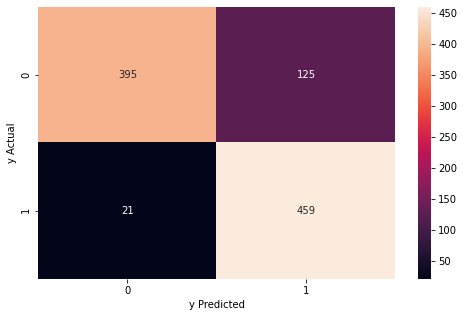

In [98]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

Random Forest 

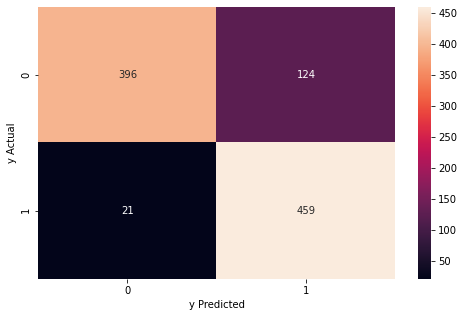

In [99]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

Logistic Regression

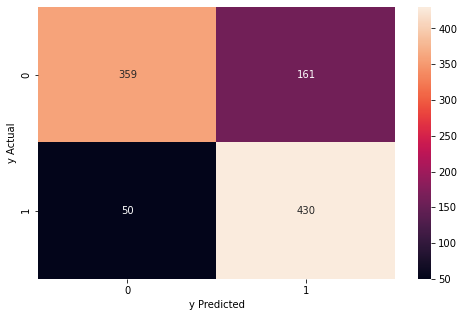

In [100]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

## Hyperparameter Tuning

Pada soal ujian ini saya memutuskan untuk menggunakan metode tuning ``RandomizedSearchCV'' dikarenakan efektifitas waktu dan performance laptop yang kiranya tidak membutuhkan memory usage yg cukup banya

##### Menentukan tiap parameter pada Model Machine Learning

In [102]:
# RandomForest Parameter
max_depth=[10,20,30,40,50,60,70,80,90,100]
min_samples_leaf= [1, 2, 4]
min_samples_split= [2, 5, 10]
n_estimators=[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

param_RF = {'max_depth':max_depth,'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split,'n_estimators':n_estimators}

In [103]:
# DecisionTree Parameter
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth=[10,20,30,40,50,60,70,80,90,100]
min_samples_split= [2, 5, 10]
min_samples_leaf= [1, 2, 4]

param_DT = {'criterion' : criterion, 'splitter' : splitter, 'max_depth':max_depth,'min_samples_leaf':min_samples_leaf, 'min_samples_split':min_samples_split}

In [104]:
# LogisticRegression Parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

param_LR = {'penalty':penalty, 'solver':solver, 'max_iter':max_iter}

### Randomize Search CV

<hr>

Random Forest Classifier Randomize


In [105]:
model_RF_RS = RandomizedSearchCV(
    model_RF, param_RF, cv = 10)

In [106]:
model_RF_RS.fit(x_train, y_train)
model_RF_RS.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 90}

Decision Tree Classifier Randomize


In [107]:
model_DT_RS = RandomizedSearchCV(
    model_DT, param_DT, cv = 5)

In [108]:
model_DT_RS.fit(x_train, y_train)
model_DT_RS.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 40,
 'criterion': 'entropy'}

Logistic Tree Classifier Randomize

In [109]:
model_LR_RS = RandomizedSearchCV(
    estimator = model_LR, param_distributions= param_LR, cv = 5)

In [110]:
model_LR_RS.fit(x_train, y_train)
model_LR_RS.best_params_

{'solver': 'sag', 'penalty': 'l2', 'max_iter': 1000}

In [113]:
model_RF_RS = RandomForestClassifier(n_estimators= 1400, min_samples_split= 5, min_samples_leaf= 4, max_depth= 90)
model_DT_RS = DecisionTreeClassifier(splitter='best', min_samples_split= 2, min_samples_leaf= 1, max_depth= 40, criterion= 'entropy')
model_LR_RS = LogisticRegression(solver= 'sag', penalty= 'l2', max_iter = 1000)
model_LR_RS.fit(x_train, y_train)
model_RF_RS.fit(x_train, y_train)
model_DT_RS.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40)

In [114]:
# Menjalankan hasil predisksi setalah dituning

y_pred_RF_RS = model_RF_tun.predict(x_test) 
y_pred_DT_RS = model_DT_tun.predict(x_test) 
y_pred_LR_RS = model_LR_tun.predict(x_test)

In [115]:
### Melihat Performance Model 
print(f'Decision Tree Model: {model_DT_RS.score(x_train,y_train)}\n Random Forest Model : {model_RF_RS.score(x_train, y_train)} \n Linear Regression Model : {model_LR_RS.score(x_train, y_train)}')

Decision Tree Model: 0.8715
 Random Forest Model : 0.86675 
 Linear Regression Model : 0.81275


### Classification Report After Tuning

Classification Report Random Forest

In [116]:
print(classification_report(y_test, y_pred_RF_RS))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       520
           1       0.79      0.95      0.86       480

    accuracy                           0.86      1000
   macro avg       0.87      0.86      0.86      1000
weighted avg       0.87      0.86      0.86      1000



Classification Report Decision Tree

In [118]:
print(classification_report(y_test, y_pred_DT_RS))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       520
           1       0.79      0.96      0.86       480

    accuracy                           0.85      1000
   macro avg       0.87      0.86      0.85      1000
weighted avg       0.87      0.85      0.85      1000



Classification Report using Logistic Regression 

In [119]:
print(classification_report(y_test, y_pred_LR_RS))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77       520
           1       0.73      0.90      0.80       480

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.81      0.79      0.79      1000



## Conffusion Metrics After Tuning


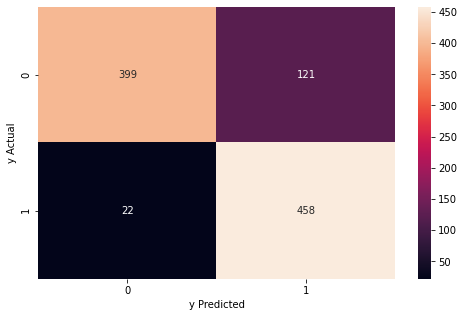

In [120]:
#
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF_RS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

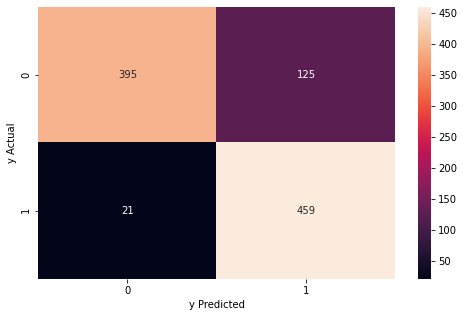

In [122]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_DT_RS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

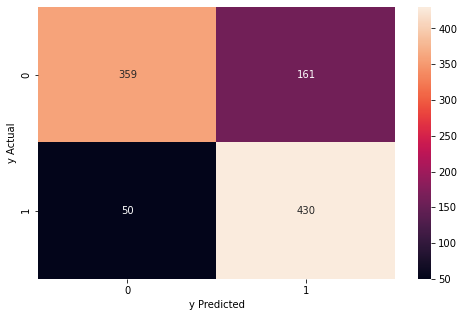

In [124]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_LR_RS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Predicted')
plt.ylabel('y Actual')
plt.show()

- Cancel = 1 (Positive)
- No Cancel =  0 (Negative)


**1. Before Tunning**

- RandomForest Classifier

        F1 Score : 86
        TN = 396  FP = 124 FN = 21 TP = 459

- Decision Tree Classifier

        F1 Score : 84
        TN = 395  FP = 125  FN = 21 TP = 495

- Logistic Regression

        F1 Score : 82
        TN = 359  FP = 161  FN = 50  TP = 430


**2. After Tunning Tunning**

- RandomForest Classifier

        F1 Score : 86
        TN = 399  FP = 121 FN = 22 TP = 458

- Decision Tree Classifier

        F1 Score : 86
        TN = 395  FP = 125  FN = 21 TP = 459

- Logistic Regression

        F1 Score : 80
        TN = 359  FP = 161  FN = 50  TP = 430

        
<br>


<hr>


Model Machine Learning yang dipakai untuk mendekati prediksi secara akurat Before maupun After Tunning Adalah `RandomForestClassifier` ataupun `DecisionTree Classifier` dapat dilihat dari nilai pada f1 Score 0.86 atau 86%. Jika `f1 score` mendekati 1 maka Nilai `Recall` ataupun `Precision` mendekati nilai kondisi yang sempurna.

<br>


**Evaluasi Keseluruhan terhadap dampak bisnis**

Ketika diprediksi No Cancel ( Negative ) dan aktual Cancel (Positive) dalam booking case. Prediksi 0 dan aktual nya 1. Dapat dilihat jumlah `TN`,`FP`,`FN`,`TP` yang tertera pada evaluation model.Example dari After Tunning Decision Tree Classifier TN (True Negative) yang berarti Aktual dan Prediksi No Cancel (0) berjumlah 395.FN (False Negative) yang berarti Aktualnya Cancel (1) dan Prediksi No Cancel (0) berjumlah 21. Artinya jumlah 27 kondisi yang sudah meng-cancel, diprediksi tidak meng-cancel maka ini akan merugikan untuk revenue perusaahan. FP (False Positive) yang artinya Aktual No Cancel dan Prediksi Cancel  berjumlah 125.TP (True Positive) yang artinya Aktualnya Cancel dan Prediksi Cancel berjumlah 459. Artinya jumlah 125 yang diprediksi cancel akan mengakibatkan kerugian untuk revenue perusahaan
            
*******
<br>

Langkah yang baik untuk meningkatkan performa model adalah meningkatkan nilai **Precision Negative Score** atau **Recall Positive Score**

*******
<br>

Dari semoua model yang telah diterapkan saya akan memilih menggunakan model Decision Tree karena hasil dari score recall positive dan precision Negative yang lebih tinggi dibanding model 2 lainnya